In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

In [27]:
# Load the dataset
data = pd.read_csv(r"C:\Users\nehal\Documents\GitHub\msba265-finalstorage\data_storage\twitter.csv")

In [28]:
# Display the first few rows
print(data.head())

   No.                                            Message   Source  Label  \
0  1.0  i feel awful about it too because it s my job ...  Twitter    0.0   
1  2.0                              im alone i feel awful  Twitter    0.0   
2  3.0  ive probably mentioned this before but i reall...  Twitter    1.0   
3  4.0           i was feeling a little low few days back  Twitter    0.0   
4  5.0  i beleive that i am much more sensitive to oth...  Twitter    2.0   

   Emotion  
0  sadness  
1  sadness  
2      joy  
3  sadness  
4     love  


In [29]:
# Data Cleaning
# Drop rows with missing values
data_cleaned = data.dropna()

In [30]:
# Remove duplicates based on the 'Message' column
data_cleaned = data_cleaned.drop_duplicates(subset=['Message'])

In [31]:
# Standardize column names
data_cleaned.columns = data_cleaned.columns.str.strip().str.lower().str.replace(" ", "_")

<function matplotlib.pyplot.show(close=None, block=None)>

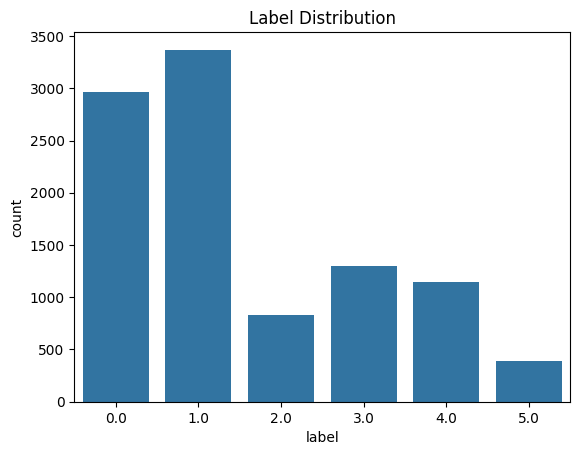

In [32]:
# Exploratory Data Analysis (EDA)
# Distribution of labels
sns.countplot(data=data_cleaned, x='label')
plt.title("Label Distribution")
plt.show

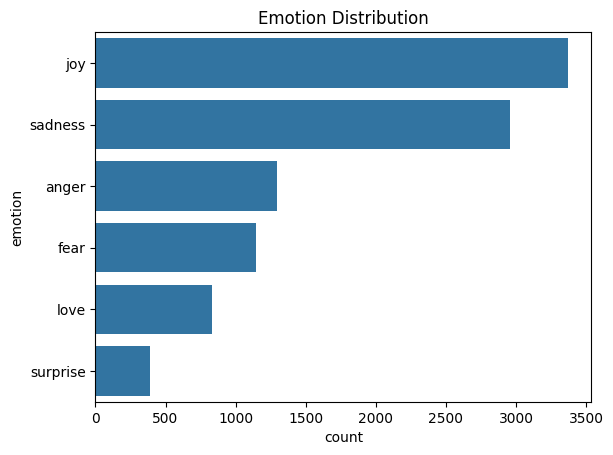

In [33]:
# Distribution of emotions (if available)
if 'emotion' in data_cleaned.columns:
    sns.countplot(data=data_cleaned, y='emotion', order=data_cleaned['emotion'].value_counts().index)
    plt.title("Emotion Distribution")
    plt.show

In [34]:
# Add message length as a feature
data_cleaned['message_length'] = data_cleaned['message'].apply(len)

<function matplotlib.pyplot.show(close=None, block=None)>

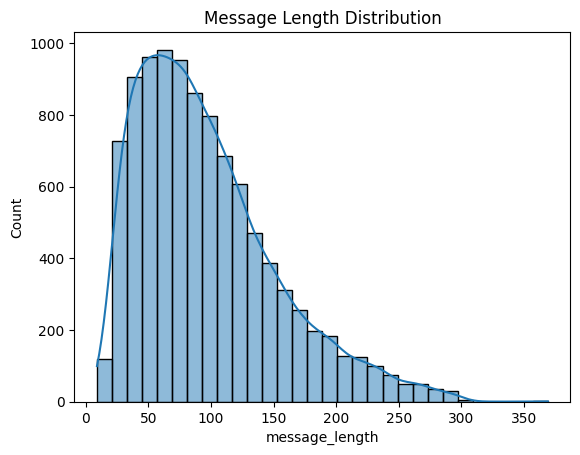

In [35]:
# Plot message length distribution
sns.histplot(data=data_cleaned, x='message_length', bins=30, kde=True)
plt.title("Message Length Distribution")
plt.show

In [36]:
# Data Transformation
# Encode categorical columns ('label', 'source', 'emotion') if available
encoder = LabelEncoder()
data_cleaned['label_encoded'] = encoder.fit_transform(data_cleaned['label'])

if 'source' in data_cleaned.columns:
    data_cleaned['source_encoded'] = encoder.fit_transform(data_cleaned['source'])
if 'emotion' in data_cleaned.columns:
    data_cleaned['emotion_encoded'] = encoder.fit_transform(data_cleaned['emotion'])

In [37]:
# Vectorize the 'Message' column using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=500)
message_vectors = vectorizer.fit_transform(data_cleaned['message']).toarray()

In [38]:
# Add vectorized text to the dataset
vectorized_df = pd.DataFrame(message_vectors, columns=vectorizer.get_feature_names_out())
data_transformed = pd.concat([data_cleaned.reset_index(drop=True), vectorized_df], axis=1)

In [39]:
# Normalize the 'message_length' column
scaler = MinMaxScaler()
data_transformed['message_length_normalized'] = scaler.fit_transform(data_transformed[['message_length']])

In [44]:
# Prepare features (X) and target (y)
X = data_transformed.drop(columns=['label', 'label_encoded', 'message', 'message_length'], errors='ignore')
y = data_transformed['label_encoded']

In [45]:
# Handle non-numeric columns using OneHotEncoder
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
if not non_numeric_cols.empty:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_features = encoder.fit_transform(X[non_numeric_cols])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(non_numeric_cols))
    X = pd.concat([X.drop(columns=non_numeric_cols, errors='ignore').reset_index(drop=True), encoded_df], axis=1)


In [46]:
# Scale all features (numeric and encoded)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=5000, solver='saga', random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000, random_state=42, solver='saga')

In [49]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [50]:
# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       592
           1       1.00      1.00      1.00       674
           2       1.00      1.00      1.00       166
           3       1.00      1.00      1.00       260
           4       1.00      1.00      1.00       229
           5       1.00      1.00      1.00        78

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999

